# 1D Fourier Transform - part 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import my_functions as mfun

## Topics

* [Functions with arbitrary period $T_{0}$](#sec1)


* [New orthogonality relations for sine and cosine functions](#sec2)


* [Fourier series defined as a combination of sines and cosines for functions with arbitrary period $T_{0}$](#sec3)


* [New orthogonality relations for complex exponential functions](#sec4)


* [Fourier series defined as a combination of complex exponentials for functions with arbitrary period $T_{0}$](#sec5)


* notebook `fourier_series_T0.ipynb`

<a id='sec1'></a>
## Functions with arbitrary period $T_{0}$

In the previous classes, we have studied the Fourier series (equations [6](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_1.ipynb#eq6), [19a](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_2.ipynb#eq19a), and [20d](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_2.ipynb#eq20d)) of periodic functions with period $2 \, \pi$. These functions, however, can be transformed into functions with arbitrary period $T_{0}$ by changing variables. Consider, for example, a function $f(x)$ obtained by stacking sine functions:

$$
f(x) = \sin(x) + \sin(2x) + \sin(3x)
$$

In [3]:
x_min = -2.2*np.pi
x_max = 2.5*np.pi

x = np.linspace(x_min, x_max, 200)

k = range(1,4)

sine = np.zeros_like(x)

for ki in k:
    sine += np.sin(ki*x)

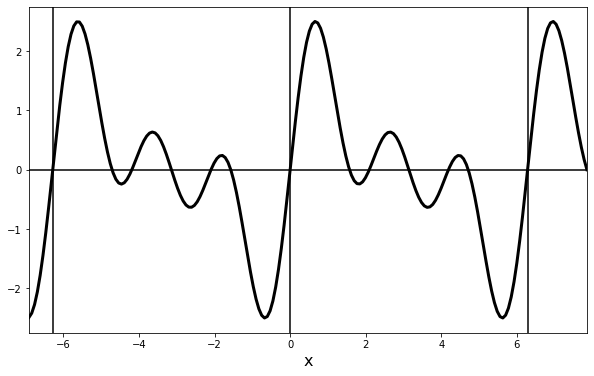

In [4]:
mfun.g_T0(x, sine, 2.*np.pi)

**<a id='fig1'>Figure 1</a>**: *Periodic function $f(x)$ obtained by stacking sine functions. The vertical lines are located at multiples of $2 \, \pi$.*

This function is defined for a variable $x$ and has a period $2 \, \pi$, which means that:

<a id='eq25'></a>

$$
f(x) = f(x + k \, 2 \, \pi) \: , \tag{25}
$$

where $k$ is an integer. Consider a new variable $y$ given by:

<a id='eq26a'></a>

$$
y = \left( \frac{T_{0}}{2 \, \pi} \right) x \quad , \tag{26a}
$$

where $T_{0}$ is a positive real number.

In [5]:
T0 = 4.
y = (T0/(2.*np.pi))*x

Now, consider the new periodic function given by:

$$
g \left( y \right) = \sin \left( \frac{2 \pi}{T_{0}} y \right) +
\sin \left( 2 \frac{2 \pi}{T_{0}} y \right) + \sin \left( 3 \frac{2 \pi}{T_{0}} y \right)
$$

In [6]:
y_min = np.min(y)
y_max = np.max(y)

y = np.linspace(y_min, y_max, 200)

sine_T0 = np.zeros_like(y)

for ki in k:
    sine_T0 += np.sin(ki*2.*np.pi*y/T0)

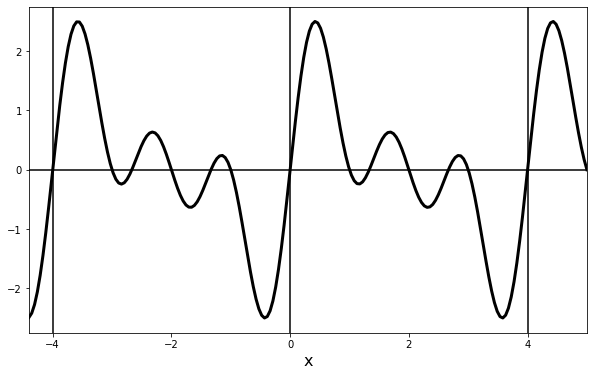

In [7]:
mfun.g_T0(y, sine_T0, T0)

**<a id='fig2'>Figure 2</a>**: *Periodic function $g(y)$ obtained by stacking sine functions. The vertical lines are located at multiples of $T_{0} = 4$.*

Notice that, although this new function $g(y)$ ([Figure 2](#fig2)) has the same shape as that shown in [Figure 1](#fig1), it has a different period $T_{0}$. This function satisfies the following condition: 

<a id='eq26b'></a>

$$
g(y) = g(y + k \, T_{0}) \: , \tag{26b}
$$

where $k$ is an integer.

<a id='sec2'></a>
## New orthogonality relations for sine and cosine functions

From [equation 26a](#eq26a), we obtain:

<a id='eq27a'></a>

$$
x = \left( \frac{2 \, \pi}{T_{0}} \right) \, y \quad , \tag{27a}
$$

<a id='eq27b'></a>

$$
dx = \left( \frac{2 \, \pi}{T_{0}} \right) \, dy \quad , \tag{27b}
$$

<a id='eq27c'></a>

$$
x = -\pi \quad \Longrightarrow \quad y = -\frac{T_{0}}{2}\quad , \tag{27c}
$$

and

<a id='eq27d'></a>

$$
x = \pi \quad \Longrightarrow \quad y = \frac{T_{0}}{2}\quad . \tag{27d}
$$

Let $m$ and $n$ be integers, e. g., $m \, , \, n \in \mathbb{N}$. Based on equations [7](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_1.ipynb#eq7), [8](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_1.ipynb#eq8), and [9](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_1.ipynb#eq9), the new orthogonality relations between sine and cosine functions are given by:

<a id='eq28'></a>

$$
\int \limits_{-\frac{T_0}{2}}^{\frac{T_0}{2}} \sin \left( m \frac{2 \, \pi}{T_{0}} y\right) \
\sin \left( n \frac{2 \, \pi}{T_{0}} y\right) \; dy =
\int \limits_{-\pi}^{\pi} \sin \left( m x \right) \
\sin \left( n x \right) \, \frac{T_{0}}{2 \, \pi} \; dx =
\begin{cases} \begin{split}
\frac{T_{0}}{2} \: &, \quad m = n \\ 
0 \: &, \quad m \ne n
\end{split} \end{cases} \quad , \tag{28}
$$

<a id='eq29'></a>

$$
\int \limits_{-\frac{T_0}{2}}^{\frac{T_0}{2}} \cos \left( m \frac{2 \, \pi}{T_{0}} y\right) \
\cos \left( n \frac{2 \, \pi}{T_{0}} y\right) \; dy =
\int \limits_{-\pi}^{\pi} \cos \left( m x \right) \
\cos \left( n x \right) \, \frac{T_{0}}{2 \, \pi} \; dx =
\begin{cases} \begin{split}
T_{0} \: &, \quad m = n = 0 \\ 
\frac{T_{0}}{2} \: &, \quad m = n \ne 0 \\ 
0 \: &, \quad m \ne n
\end{split} \end{cases} \quad , \tag{29}
$$

and

<a id='eq30'></a>

$$
\int \limits_{-\frac{T_0}{2}}^{\frac{T_0}{2}} \sin \left( m \frac{2 \, \pi}{T_{0}} y\right) \
\cos \left( n \frac{2 \, \pi}{T_{0}} y\right) \; dy =
\int \limits_{-\pi}^{\pi} \sin \left( m x \right) \
\cos \left( n x \right) \, \frac{T_{0}}{2 \, \pi} \; dx = 0 \quad . \tag{30}
$$

<a id='sec3'></a>
## Fourier series defined as a combination of sines and cosines for functions with arbitrary period $T_{0}$

Let $g (y)$ be a function that is periodic over $\left[ 0 \, , \, T_{0} \right]$, e. g., $g(y) = g(y + k \, T_{0})$, where $k$ is any integer, and satisfies the [Dirichlet conditions](https://en.wikipedia.org/wiki/Dirichlet_conditions) on this interval. In this case, $g(y)$ can be represented by an infinite series of sine and cosine functions given by

<a id='eq31a'></a>

$$
g(y) = \frac{a_{0}}{2} + \sum \limits_{n=1}^{N} 
\underbrace{a_{n} \cos \left( n \, 2 \, \pi \, f_{0} \, y \right)}_{\text{even functions}} + 
\underbrace{b_{n} \sin \left( n \, 2 \, \pi \, f_{0} \, y \right)}_{\text{odd functions}} \: , \quad N \to \infty \: , \tag{31a}
$$

where

<a id='eq31b'></a>

$$
f_{0} = \frac{1}{T_{0}} \tag{31b}
$$

is the **fundamental frequency**,

<a id='eq32'></a>

$$
a_{0} = \frac{2}{T_{0}} \int \limits_{-\frac{T_{0}}{2}}^{\frac{T_{0}}{2}} g (y) \, dy \quad , \tag{32}
$$

<a id='eq33'></a>

$$
a_{n} = \frac{2}{T_{0}} \int \limits_{-\frac{T_{0}}{2}}^{\frac{T_{0}}{2}} 
\cos \left( n \, 2 \, \pi \, f_{0} \, y \right) \, g (y) \; dy \quad , \tag{33}
$$

and

<a id='eq34'></a>

$$
b_{n} = \frac{2}{T_{0}} \int \limits_{-\frac{T_{0}}{2}}^{\frac{T_{0}}{2}} 
\sin \left( n \, 2 \, \pi \, f_{0} \, y \right) \, g (y) \; dy \quad . \tag{34}
$$

<a id='sec4'></a>
## New orthogonality relations for complex exponential functions

Let $m$ and $n$ be integers, e. g., $m \, , \, n \in \mathbb{N}$. Based on equations [21a](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_2.ipynb#eq21a)$-$[22c](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/fourier_1D_2.ipynb#eq22c), the new orthogonality relations between exponential functions are given by:

<a id='eq35'></a>

$$
\int \limits_{-\frac{T_{0}}{2}}^{\frac{T_{0}}{2}} e^{\, -i \, n \, 2 \, \pi \, f_{0} \, y } \, e^{\, i \, n \, 2 \, \pi \, f_{0} \, y} \, dy = 
\begin{cases} \begin{split}
T_{0} \: &, \quad m = n \\
0 \: &, \quad m \ne n \\
\end{split} \end{cases} \quad . \tag{35}
$$

<a id='sec5'></a>
## Fourier series defined as a combination of complex exponentials for functions with arbitrary period $T_{0}$

<a id='eq36'></a>

$$
g(y) = \sum \limits_{n=-N}^{N} c_{n} \, e^{\, i \, 2 \, \pi \, n \, f_{0} \, y} \: , \quad \text{for} \; 
N \to \infty \: , \tag{36}
$$

<a id='eq37'></a>

$$
c_{n} = \frac{1}{T_{0}} \int \limits_{-\frac{T_{0}}{2}}^{\frac{T_{0}}{2}} e^{\, -i \, 2 \, \pi \, n \, f_{0} \, y} \, g(y) \; dy \: . \tag{37}
$$